# Overcomplete Autoencoder (OAE) Tutorial

## Introduction

An Overcomplete Autoencoder (OAE) is a type of autoencoder where the dimension of the latent space (the bottleneck layer) is greater than the input dimension. This allows the model to learn a richer and more detailed representation of the data. However, it also increases the risk of overfitting.

## Architecture

An OAE consists of two main parts:
1. **Encoder**: Maps the input to an expanded latent-space representation.
2. **Decoder**: Reconstructs the input from the latent space representation.

### Encoder

The encoder function, $h = f(x)$, maps the input $x$ to a hidden representation $h$. Mathematically, this can be written as:

$$
h = f(x) = \sigma(Wx + b)
$$

where:
- $W$ is a weight matrix
- $b$ is a bias vector
- $\sigma$ is an activation function (e.g., ReLU, sigmoid)

### Decoder

The decoder function, $\hat{x} = g(h)$, maps the hidden representation $h$ back to the original input space. Mathematically, this can be written as:

$$
\hat{x} = g(h) = \sigma(W'h + b')
$$

where:
- $W'$ is a weight matrix
- $b'$ is a bias vector
- $\sigma$ is an activation function

### Loss Function

The loss function for an OAE is typically the mean squared error (MSE) between the input and the reconstructed output:

$$
L = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

## Training Process

Training an OAE involves minimizing the loss function with respect to the weights and biases of the encoder and decoder. This is typically done using gradient descent.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W'$ is:

$$
\frac{\partial L}{\partial W'} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial W'}
$$

Since $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial \hat{x}}{\partial W'} = h \cdot \sigma'(W'h + b')
$$

Thus,

$$
\frac{\partial L}{\partial W'} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot h^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W$ is:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial W}
$$

Since $h = \sigma(Wx + b)$, we have:

$$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial h} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T
$$

And,

$$
\frac{\partial h}{\partial W} = x \cdot \sigma'(Wx + b)
$$

Thus,

$$
\frac{\partial L}{\partial W} = [(x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T] \cdot x^T \cdot \sigma'(Wx + b)
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W \leftarrow W - \eta \frac{\partial L}{\partial W}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.


# Advantages and Drawbacks

## Advantages
- **Rich Representation**: OAEs can learn a richer and more detailed representation of the data due to the larger latent space.
- **Feature Learning**: OAEs can learn complex feature representations which can be useful for downstream tasks like classification and clustering.
- **Flexibility**: The larger latent space allows more flexibility in capturing various aspects of the input data.

## Drawbacks
- **Overfitting**: The larger latent space increases the risk of overfitting, especially if the dataset is not sufficiently large.
- **Computational Cost**: Training OAEs can be more computationally expensive due to the increased number of parameters.
- **Redundancy**: The overcomplete representation may introduce redundancy, capturing noise instead of useful features.






11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 26s 97ms/step - loss: 0.1361 - val_loss: 0.0806
Epoch 2/50
235/235 [==============================] - 23s 100ms/step - loss: 0.0746 - val_loss: 0.0700
Epoch 3/50
235/235 [==============================] - 16s 70ms/step - loss: 0.0689 - val_loss: 0.0672
Epoch 4/50
235/235 [==============================] - 15s 64ms/step - loss: 0.0669 - val_loss: 0.0661
Epoch 5/50
235/235 [==============================] - 15s 63ms/step - loss: 0.0659 - val_loss: 0.0653
Epoch 6/50
235/235 [==============================] - 15s 64ms/step - loss: 0.0653 - val_loss: 0.0649
Epoch 7/50
235/235 [==============================] - 15s 63ms/step - loss: 0.0649 - val_loss: 0.0645
Epoch 8/50
235/235 [==============================] - 15s 66ms/step - loss: 0.0646 - val_loss: 0.0643
Epoch 9/50
235/235 [==============================] - 15s 65ms/step - loss: 0.0644 - val_loss: 0.0641
Epoch 10/50
235/

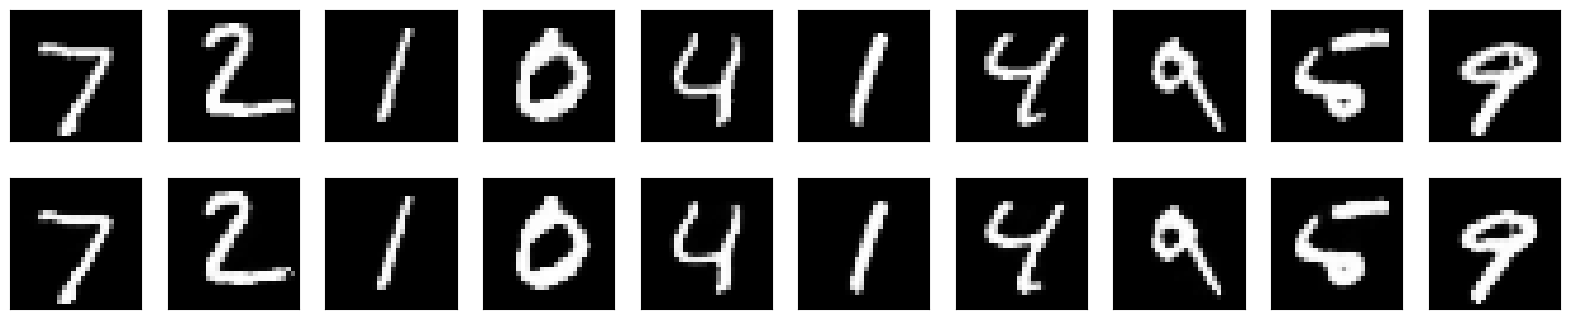

In [ ]:
### Example Data

import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the OAE architecture
input_dim = 784
encoding_dim = 1024  # Overcomplete representation

inputs = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(inputs)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create OAE model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the OAE
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()